### TRABALHO PROGRAMAÇÃO - APLICAR MODELO REGRESSÃO LINEAR PARA:
###    ESTIMAR PREÇO DE UM BONSAI MEDIANTE O SEU Nº ANOS

In [2]:
import numpy as np

In [3]:
#Dados obtidos sobre bonsais
idades =[8,3,6,16,10,20]
preco=[60,20,40,140,96,200]
dados = np.array([idades,preco])
print(f'As observações analisadas são as seguintes:\nDados\t\t\t\tCoordenadas')
for i, (idade, valor) in enumerate(zip(idades, preco), start=1):
    print(f'Bonsai {i} - {idade} anos > {valor} euros\tx,y={idade,valor}')

As observações analisadas são as seguintes:
Dados				Coordenadas
Bonsai 1 - 8 anos > 60 euros	x,y=(8, 60)
Bonsai 2 - 3 anos > 20 euros	x,y=(3, 20)
Bonsai 3 - 6 anos > 40 euros	x,y=(6, 40)
Bonsai 4 - 16 anos > 140 euros	x,y=(16, 140)
Bonsai 5 - 10 anos > 96 euros	x,y=(10, 96)
Bonsai 6 - 20 anos > 200 euros	x,y=(20, 200)


In [4]:
#Fórmula da regressão linear => Y = coef0+coef1*X
#Y,X => dados da hipotese a prever

#Cálculo da regressão linear:
#1º Calcular as distâncias das observações ao ponto médio:
#       1.1 calcular ponto médio
#       1.2 Calcular o somatório do produto dos desvios de cada ponto face ao ponto médio =Sum(dX*dY)
#           1.2.1 distância de X ao Xmédio =>  dX = Xi-Xmédio
#           1.2.2 distância de Y ao Ymédio =>  dY = Yi-Ymédio
#       1.3 Calcular o somatório dos quadrados dos desvios de X face ao Xmédio => dX^2 = (Xi-Xmédio)^2
#2º Calcular os coeficientes
#       2.1 coef1 = Sum (dXi*dYi)/Sum (dXi^2)
#       2.2 coef0 =Ymédio-coef1*Xmédio
#3º Aplicar a Regressão Linear
#4º Visualizar gráficamente

In [5]:
#1.1 Calcular o ponto médio
#calcular o X médio
X_medio = sum(idades)/len(idades)
#calcular o Y médio
Y_medio = sum(preco)/len(preco)
print(f'o ponto médio do conjunto das observações {dados} é x,y=({int(X_medio)},{int(Y_medio)})')


o ponto médio do conjunto das observações [[  8   3   6  16  10  20]
 [ 60  20  40 140  96 200]] é x,y=(10,92)


In [6]:
#1.2 Calcular o somatório do produto dos desvios de cada ponto face ao ponto médio =Sum(Xi-Xmédio)*(Yi-Ymédio)
def desvios(idades, preco, X_medio, Y_medio):
    soma_prod_desvios = 0
    for x, y in zip(idades,preco):
        soma_prod_desvios += (x - X_medio) * (y - Y_medio)
    return soma_prod_desvios
   
soma_prod_desvios=desvios(idades, preco, X_medio, Y_medio)
soma_prod_desvios


2142.0

In [7]:
#1.3 Calcular o somatório dos quadrados dos desvios do X de cada ponto face ao X do ponto médio =Sum(Xi-Xmédio)^2
def quad_X(idades, X_medio):
    soma_quad_X = 0
    for x in idades:
        soma_quad_X += (x - X_medio)**2
    return soma_quad_X
   
soma_quad_X=quad_X(idades, X_medio)
soma_quad_X


203.5

In [8]:
#2.1 coef1 = Sum (dXi*dYi)/Sum (dXi^2)
coef1 = soma_prod_desvios/soma_quad_X
#2.2 coef0 =Ymédio-coef1*Xmédio
coef0 = Y_medio-coef1*X_medio
print(f'O modelo de Regressão Linear tem como intercept = {coef0} e como coeficiente da variável X = {coef1}')

O modelo de Regressão Linear tem como intercept = -17.85421785421785 e como coeficiente da variável X = 10.525798525798526


In [9]:
#3º Aplicar a Regressão Linear
# Inserir dados a prever
X = int(input('Qual a idade do bonsai que pretendes prever a preço?'))

# Dados previstos
Y_teste = coef0 + coef1*X
print(f'O preço previsto para um bonsai com idade de {X} anos é de {int(Y_teste)} euros')

O preço previsto para um bonsai com idade de 8 anos é de 66 euros


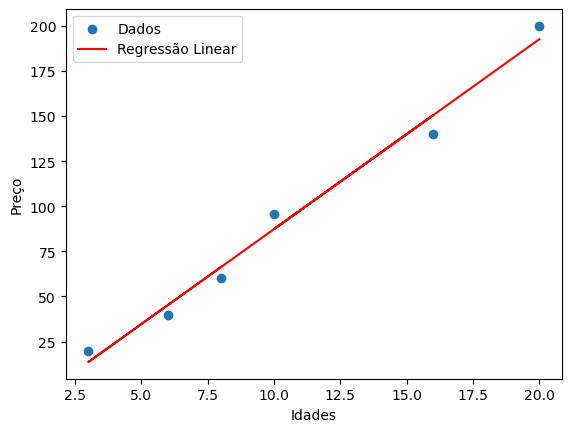

In [10]:
#4º Visualizar gráficamente

import matplotlib.pyplot as plt
# Criar a linha de regressão linear
regression_line = coef0 + coef1 * np.array(idades)

# Gráfico das observações
plt.scatter(idades, preco, label='Dados')

# Gráfico da linha de regressão
plt.plot(idades, regression_line, color='red', label='Regressão Linear')

# Legendas do gráfico
plt.xlabel('Idades')
plt.ylabel('Preço')
plt.legend()


plt.show()